In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cufflinks as cf
cf.go_offline()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

In [3]:
data = pd.read_csv(r'C:\Users\Giorgis\Desktop\Projects\ADTA coursework\partI\Census.csv')
data = data.dropna()
data.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
302321,7394645,E12000001,H,5,1,2,5,4,2,1,3,1,2,2,7,7,1,2.0,4
302322,7394688,E12000001,H,2,1,2,2,1,1,1,1,1,9,4,7,4,1,1.0,2
302323,7394756,E12000001,H,2,1,2,5,2,2,1,3,1,1,1,9,9,1,10.0,4
302324,7394737,E12000001,H,2,1,2,6,2,2,1,1,1,2,1,9,11,1,3.0,4
302325,7394536,E12000001,H,5,1,2,6,3,2,1,2,1,1,1,9,10,1,8.0,4


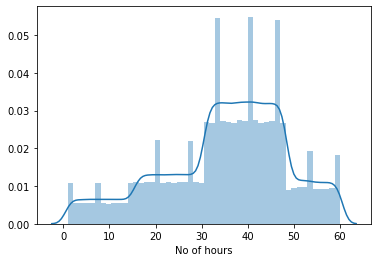

In [4]:
sns.distplot(data['No of hours'])

In [5]:
attributesX = list(data.columns)
attributesX.remove('No of hours')
attributesX.remove('Region')
attributesX.remove('Residence Type')
attributesX.remove('Person ID')
attributesX

['Family Composition',
 'Population Base',
 'Sex',
 'Age',
 'Marital Status',
 'Student',
 'Country of Birth',
 'Health',
 'Ethnic Group',
 'Religion',
 'Economic Activity',
 'Occupation',
 'Industry',
 'Hours worked per week',
 'Approximated Social Grade']

In [6]:
X = data[['Family Composition',
 'Population Base',
 'Sex',
 'Age',
 'Marital Status',
 'Student',
 'Country of Birth',
 'Health',
 'Ethnic Group',
 'Religion',
 'Economic Activity',
 'Occupation',
 'Industry',
 'Hours worked per week',
 'Approximated Social Grade']]

y = data['No of hours']

In [7]:
# X = np.array(X)
# y = np.array(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

C:\Users\Giorgis\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [11]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0625535208792195


In [12]:
print('intercept:', model.intercept_)

intercept: [ 0.51249774  0.4606749   0.5171442   0.53402618  0.50282831  0.5346608
  0.4777173   0.55080435  0.58317667  0.47913145  0.41106898  0.48192463
  0.48526296  0.44217926  0.53720646  0.67802386  0.68292594  0.65059981
  0.64399307  0.65846619  0.58671725  0.55571357  0.72237928  0.6607852
  0.60670898  0.76466206  0.69337272  0.64461797  0.55533325  0.57504359
  0.76614358  0.8434087   0.8374333   0.73246306  0.80040608  0.78218226
  0.76759366  0.82695381  0.76166619  0.7600284   0.77566748  0.6924904
  0.7543076   0.76669395  0.74578815  0.82735184  0.73400799  0.76628048
 -2.48976085 -2.5742909  -2.63369822 -2.67574102 -2.74143679 -2.58393838
 -2.56110992 -2.6696881  -2.51381255 -2.54630493 -2.54472901 -2.59600318]


In [13]:
preds = model.predict(X_test)
for i in range(0, len(preds)):
    preds[i] = round(preds[i], 2)

In [14]:
len(y_test)
len(data['No of hours'])
len(preds)

80226

In [15]:
MAE = round(metrics.mean_absolute_error(y_test, preds), 2)
print("MAE:", MAE)

MAE: 5.68


In [16]:
MSE = round(metrics.mean_squared_error(y_test, preds),2)
print("MSE:", MSE)

MSE: 52.08


In [17]:
RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, preds)),2)
print("RMSE:", RMSE)

RMSE: 7.22


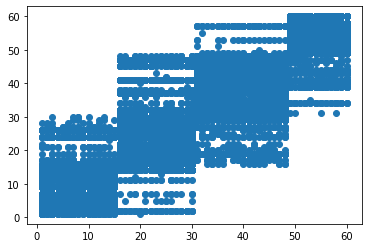

In [18]:
plt.scatter(y_test, preds)